In [13]:
import csv
import hashlib
from typing import List, Set

def kmp_search(text: str, pattern: str) -> List[int]:
    if not pattern or not text:
        return []

    pattern_length = len(pattern)
    text_length = len(text)
    lps = [0] * pattern_length
    j = 0

    compute_lps(pattern, pattern_length, lps)

    i = 0
    indices = []
    while i < text_length:
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == pattern_length:
            indices.append(i - j)
            j = lps[j - 1]
        elif i < text_length and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return indices


def compute_lps(pattern: str, pattern_length: int, lps: List[int]):
    if pattern_length == 0:
        return
    
    length = 0
    lps[0] = 0
    i = 1

    while i < pattern_length:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1


def lcss(x: str, y: str) -> int:
    m = len(x)
    n = len(y)
    lcss_table = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                lcss_table[i][j] = 0
            elif x[i - 1] == y[j - 1]:
                lcss_table[i][j] = lcss_table[i - 1][j - 1] + 1
            else:
                lcss_table[i][j] = max(lcss_table[i - 1][j], lcss_table[i][j - 1])

    return lcss_table[m][n]

def rabin_karp_fingerprint(text: str, pattern: str, d: int = 256, q: int = 101) -> List[int]:
    m = len(pattern)
    n = len(text)
    h = pow(d, m - 1) % q
    p = 0
    t = 0
    result = []

    if n < m:
        return result

    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    for s in range(n - m + 1):
        if p == t:
            if text[s:s + m] == pattern:
                result.append(s)

        if s < n - m:
            t = (t - h * ord(text[s])) % q
            t = (t * d + ord(text[s + m])) % q
            t = (t + q) % q

    return result


def plagiarism_detection(documents: List[str], potential_plagiarized: str) -> Set[int]:
    plagiarized_indices = set()
    threshold = 0.8

    for index, document in enumerate(documents):
        if len(document) < len(potential_plagiarized):
            continue

        kmp_indices = kmp_search(potential_plagiarized, document)
        if kmp_indices:
            plagiarized_indices.add(index)
            continue

        lcss_value = lcss(potential_plagiarized, document)
        lcss_ratio = lcss_value / max(len(potential_plagiarized), len(document))
        if lcss_ratio > threshold:
            plagiarized_indices.add(index)
            continue

        rabin_karp_indices = rabin_karp_fingerprint(potential_plagiarized, document)
        if rabin_karp_indices:
            plagiarized_indices.add(index)

    return plagiarized_indices

def read_csv_file(filename: str) -> List[str]:
    documents = []
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            documents.append(row['content'])
    return documents

def main():
    input_csv = 'combined-data.csv'  # Replace with your input CSV file name
    documents = read_csv_file(input_csv)

    potential_plagiarized = "This is an example of a potentially plagiarized document."

    plagiarized_documents = plagiarism_detection(documents, potential_plagiarized)
    print(f'Plagiarized documents found at indices: {plagiarized_documents}')

if __name__ == '__main__':
    main()

Plagiarized documents found at indices: set()


KMP execution time: 0.35 seconds
LCSS execution time: 26.78 seconds
RABIN_KARP execution time: 0.13 seconds


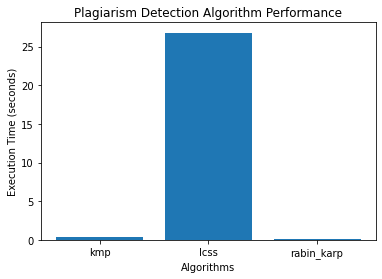

In [14]:
import time
import matplotlib.pyplot as plt

def timed_plagiarism_detection(algorithm, documents, potential_plagiarized):
    start_time = time.time()
    plagiarized_documents = plagiarism_detection(algorithm, documents, potential_plagiarized)
    end_time = time.time()
    return end_time - start_time

def plagiarism_detection(algorithm, documents, potential_plagiarized):
    plagiarized_indices = set()

    for index, document in enumerate(documents):
        match_indices = []
        if algorithm == 'kmp':
            match_indices = kmp_search(potential_plagiarized, document)
        elif algorithm == 'lcss':
            lcss_value = lcss(potential_plagiarized, document)
            lcss_ratio = lcss_value / max(len(potential_plagiarized), len(document))
            if lcss_ratio > 0.8:
                match_indices.append(index)
        elif algorithm == 'rabin_karp':
            match_indices = rabin_karp_fingerprint(potential_plagiarized, document)
        else:
            raise ValueError(f'Unknown algorithm: {algorithm}')

        if match_indices:
            plagiarized_indices.add(index)

    return plagiarized_indices


def main():
    input_csv = 'combined-data.csv'
    documents = read_csv_file(input_csv)

    potential_plagiarized = "This is an example of a potentially plagiarized document."

    algorithms = ['kmp', 'lcss', 'rabin_karp']
    execution_times = []

    for algorithm in algorithms:
        exec_time = timed_plagiarism_detection(algorithm, documents, potential_plagiarized)
        print(f'{algorithm.upper()} execution time: {exec_time:.2f} seconds')
        execution_times.append(exec_time)

    plt.bar(algorithms, execution_times)
    plt.xlabel('Algorithms')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Plagiarism Detection Algorithm Performance')
    plt.show()

if __name__ == '__main__':
    main()
